<a href="https://colab.research.google.com/github/Adnan10101/Tesla-Stock-Price-Prediction/blob/main/Prediction_with%20_FBprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [219]:
df = pd.read_csv("/content/Tesla.csv")
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [220]:
df_new = df.drop( {"High","Low","Close","Volume","Adj Close"}, axis = 1)
df_new

,Date,Open
0,6/29/2010,19.000000
1,6/30/2010,25.790001
2,7/1/2010,25.000000
3,7/2/2010,23.000000
4,7/6/2010,20.000000
...,...,...
1687,3/13/2017,244.820007
1688,3/14/2017,246.110001
1689,3/15/2017,257.000000
1690,3/16/2017,262.399994


In [221]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1692 non-null   object 
 1   Open    1692 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.6+ KB


In [222]:
df_new.rename(columns ={"Date":"ds","Open":"y"},inplace = True)
df_new

,ds,y
0,6/29/2010,19.000000
1,6/30/2010,25.790001
2,7/1/2010,25.000000
3,7/2/2010,23.000000
4,7/6/2010,20.000000
...,...,...
1687,3/13/2017,244.820007
1688,3/14/2017,246.110001
1689,3/15/2017,257.000000
1690,3/16/2017,262.399994


In [223]:
df_new["ds"] = pd.to_datetime(df_new["ds"])

In [224]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1692 non-null   datetime64[ns]
 1   y       1692 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 26.6 KB


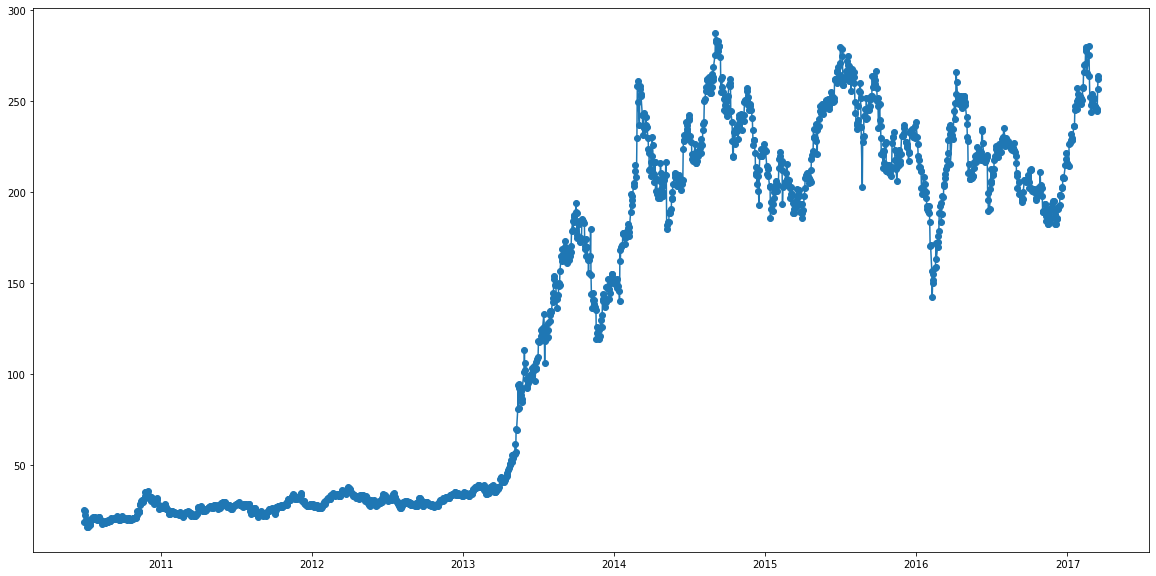

In [225]:
plt.figure(figsize = (20,10))
plt.plot(df_new["ds"],df_new["y"])
plt.scatter(df_new["ds"],df_new["y"])

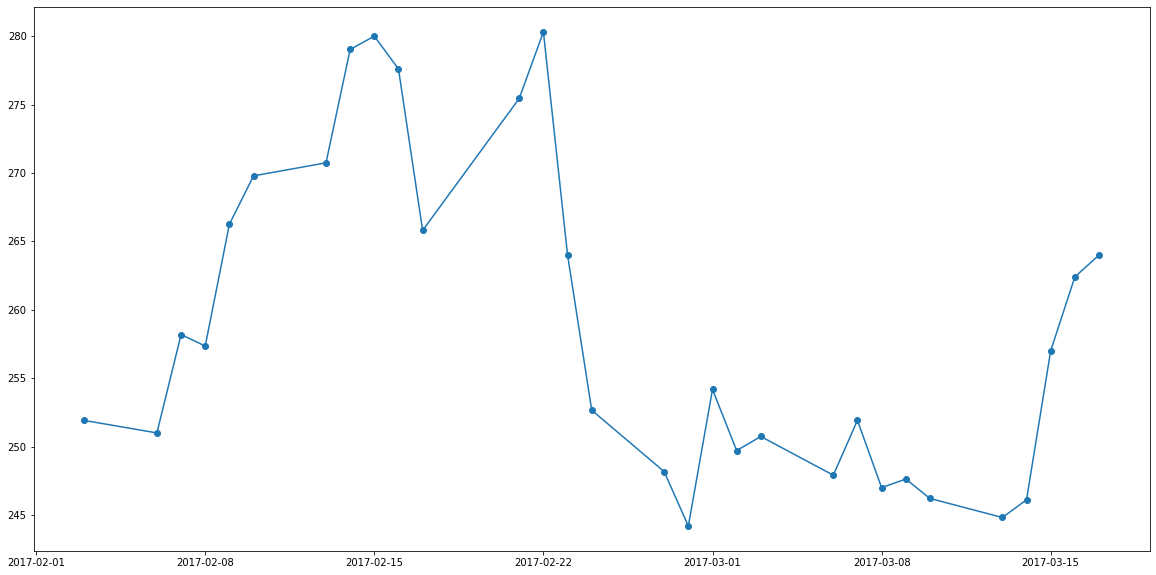

In [226]:
plt.figure(figsize = (20,10))
plt.plot(df_new["ds"].tail(30),df_new["y"].tail(30))
plt.scatter(df_new["ds"].tail(30),df_new["y"].tail(30))

In [227]:
from fbprophet import Prophet

In [228]:
model = Prophet(changepoint_prior_scale = 1)
model.fit(df_new)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [232]:
future_values = model.make_future_dataframe(periods = 120)

In [233]:
forecasted_values = model.predict(future_values)

<Figure size 1440x720 with 0 Axes>

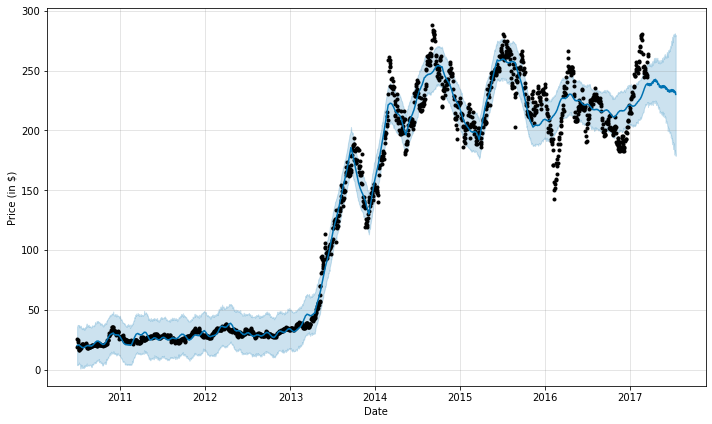

In [235]:
plt.figure(figsize = (20,10))
model.plot(forecasted_values,xlabel = 'Date', ylabel = 'Price (in $)')

plt.show()